# Соединения Солнца и Астрономических Объектов

## 1. Немного о вычислениях

В астрономии используется несколько видов координат. Один из них - геоцентрические; представьте поверхность Земли с нанесённой на неё разметкой в виде меридианов и параллелей, при этом последние удаляются в бесконечность, образуя т.н. небесную сферу. С точки зрения земного наблюдателя по небесной сфере движутся все астрономические объекты. Измеряя их положение в одно и то же фикисированное время суток на протяжении времени, примерно соответствующему одному земному году, можем заметить, что астрономические объекты 

Теперь вспомним, что Земля вращается вокруг Солнца под углом. 

### Вторая экваториальная система:

Основная плоскость - плоскость небесного экватора, в случае геоцентрической координатной системы совпадает с плоскостью Земного экватора.

Координаты второй экваториальной системы - (прямое восхождение, склонение) = (Ra, Dec).

$\textbf{Ra}$ (обозначается как $\alpha$) - англ. $\textbf{right ascension}$ - прямое восхождение, дуга небесного экватора от точки весеннего равноденствия до круга склонения светила, или угол между направлением на точку весеннего равноденствия и плоскостью круга склонения светила. Является эквивалентом долготы, отсчитывается от точки весеннего равноденствия (напомним, так называют точку, где Солнце пересекает небесный экватор в весеннее время года).

$\textbf{Dec}$ (обозначается как $\delta$) - англ. $\textbf{declination}$ - склонение, равняется угловому расстоянию на небесной сфере от плоскости небесного экватора до объекта; имеет знак ($+ \delta$ для объектов выше небесного экватора (север), $- \delta$ для объектов ниже (расположенных к югу). Является эквивалентом земной широты, отсчитывается от плоскости небесного экватора (в этой же плоскости лежит земной экватор).

Обе величины могут быть записаны в одном из двух форматов: в часовом $\textbf{h:m:s}$, где $h \in [0,24)$, $m, s \in [0, 60)$ (часы:минуты:секунды), либо угловом $\bf{a^o \, b' \, c''}$ (или $\textbf{a:b:c}$), $ a \in [0, 360)$ для $\alpha$ и $a \in [-90, 90]$ для $\delta$, $b,c \in [0, 60)$ (градусы:минуты:секунды).

### Приближение времени соединения Солнца и астрономического объекта

Считаем, что объект априори образует соединение с Солнцем (т.е., окзывается в некоторой малой окрестности Солнца с точки зрения наблюдателя). Для определения времени нам потребуются Ra ($\alpha$) координата Солнца и объекта. Обозначим их как $\alpha_{Sun}$ и $\alpha_{obj}$.

Здесь важно сделать ремарку о том, в каком формате доступны координаты Солнца. Таблицы, содержащие эти координаты для заданного объекта (а также и ряд других параметров) называют $\textbf{эфемеридами}$. Эфемериды вычисляются с учётом локального положения наблюдателя на поверхности Земли. Данный скрипт использует эфемериды Александровича, доступные по ссылке: http://hea.iki.rssi.ru/~nik/ak/sun.htm . Указанные эфемериды Солнца вычислены на каждый день для часового пояса UTC +03:00 (12:00 по Московскому зимнему времени). На момент написания данного текста эфемериды доступны с 1.12.2014 по 31.01.2016.

Таким образом, в нашем распоряжении оказываются координаты Солнца, вычисленные с шагом в одни сутки. Для приближённого вычисления времени соединения можно вычислить среднюю скорость движения Солнца по Ra-координате за 24 часа:
$$v_{\text{ср}} = \frac{\alpha_{Sun}^{[1]} - \alpha_{Sun}^{[0]}}{\Delta t} = \frac{\Delta \alpha_{Sun}}{\Delta t},$$
где $\Delta t = 24$ часа, $\alpha_{Sun}^{[0]}, \, \alpha_{Sun}^{[1]}$ - соседние измерения Ra-координаты Солнца.

Далее, из предположения о том, что соединения в указанный 24-часовой промежуток (от полудня первого дня до полудня дня второго) всё-таки произойдёт, вытекает, что в некоторый момент времени Ra-координаты Солнца и объекта совпадут. Что же, тогда не составляет никакого труда вычислить длину пути по $\alpha$-координате:
$$s = \alpha_{obj} - \alpha_{Sun}^{[0]},$$
и время соединения (в приближении равномерного движения по Ra-координате!) вычисляется по простой школьной формуле путём деления длины пути на скорость движения:
$$t_{appr.} = t_0 + \frac{s}{v_{\text{ср}}},$$
где индекс "appr." является сокращением от "approximate" (приближённый), а $t_0$ - время измерения $\alpha_{Sun}^{[0]}$.

### Вычисление удалённости положения объекта от Солнечной эклиптики

Здесь тоже всё относительно просто: необходимы $\delta$-координаты Солнца в момент соединения и объекта, из координаты Солнца вычитаем координату объекта, получаем расстояние, на котором объект отстоит от Солнца по данной координате:
$$\rho(\text{Sun}, \text{obj}) = \delta_{\text{Sun}} - \delta_{\text{obj}},$$
т.к. $\alpha$-координаты в момент соединения совпадают. Координаты $\delta_{\text{obj}}$ для астрономических объектов доступны из астрономических каталогов. С Dec-координатой для Слнца приходится немного сложнее.


Существуют формулы для приближённого вычисления склонения Солнца в зависимости от дня в году и времени суток. Здесь была использована следующая формула:
$$\delta \approx \frac{\pi}{180} \arcsin\left[ \sin\left(-23.44^o \frac{\pi}{180}\right) \cos\left(\frac{2 \pi}{365.24}(N+10) + 2 \cdot 0.0167 \cdot \sin\left(\frac{2 \pi}{365.24} (N-2)\right)\right) \right]$$

Параметр N изменяется от 0 до 365(366), при этом полагается изменяющимся непрерывно. Это даёт возможность учитывать суточное время. Так, для 12 часов 1.01 числа $N=0.5$. Мы можем построить график данной функциии. В следующей ячейке опишем код с комментариями на русском. [К сожалению, пока не разобрался, как подружить русские символы и код, поэтому через одну ячейку дублирую код - дубликат уже можно запускать без опасений]




In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

#### НЕ ЗАПУСКАТЬ ДАННЫЙ БЛОК !!!! ОН ДЛЯ НАГЛЯДНОСТИ #####
%matplotlib inline # u"это нужно, чтобы мы увидели график здесь же"

import matplotlib.pyplot as plt # u"загружаем библиотеку для построения графиков"
import numpy as np # u"загружаем библиотеку для работы с числовыми массивами данных"

# u"а теперь определим функцию, реализующую описанную формулу"

def sundec(N):
    tmp = np.sin(-23.44 * np.pi / 180)
    tmp *= np.cos(2*np.pi / 365.24 * ( N + 10) + 2*0.0167*np.sin(2*np.pi / 365.24*(N-2)))
    return np.arcsin(tmp)*180/np.pi

Nmin = 0 # левый предел парметра N
Nmax = 365 # правый предел параметра N
step = 1. / 24. # шаг, выбрали равный одному часу

N = np.arange(Nmin, Nmax, step) # массив чисел от Nmin до Nmax с шагом step
f = sundec(N)

plt.plot(N, f) # строим график в плоскости (x, y), где x = N, y = f(N)
plt.show() # выгружаем график из памяти на устройство вывода

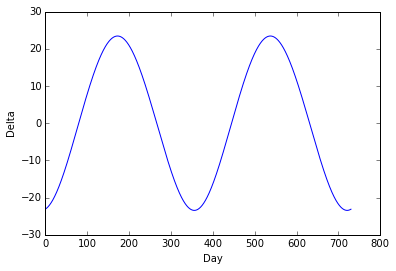

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def sundec(N):
    tmp = np.sin(-23.44 * np.pi / 180)
    tmp *= np.cos(2*np.pi / 365.24 * ( N + 10) + 2*0.0167*np.sin(2*np.pi / 365.24*(N-2)))
    return np.arcsin(tmp)*180/np.pi

Nmin = 0
Nmax = 365*2
step = 1. / 24.

N = np.arange(Nmin, Nmax, step)
f = sundec(N)

plt.plot(N, f)
plt.xlabel('Day')
plt.ylabel('Delta')

In [5]:
import numpy as np
import time
from coord import coord

star_day = 60*60*24#86164.090530833 #seconds
    
def sundec(N):
    tmp = np.sin(-23.44 * np.pi / 180)
    tmp *= np.cos(2*np.pi / 365.24 * ( N + 10) + 2*0.0167*np.sin(2*np.pi / 365.24*(N-2)))
    return np.arcsin(tmp)*180/np.pi

def numdays(day, month, vis = False):
    mns = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    if vis:
        mns[1] +=1
    mns = np.array(mns)
    month -= 1
    tmp = mns[:month].sum()
    tmp += day
    return tmp - 1

def comp_time(sun1, sun2, sun3, star):
    st = star.f2s()
    s1 = sun1.f2s()
    s2 = sun2.f2s()
    s3 = sun3.f2s()
    assert (st > s1) and (s3 > st), 'Object is not in interval'
    if st < s2:
        sun = sun1
        ds = sun2 - sun1
        num = 0
    else:
        sun = sun2
        ds = sun3 - sun1
        num = 1
    point = star - sun # intersection path
    pra = point.f2s() # path in seconds
    vra = ds / star_day # velocity
    t = coord(0, 0, pra / vra)# time of intersection
    return t, num

def comp_dist(day, mon, time, obj_dec):
    N = numdays(day, mon)
    tm = star_day/2 + time.f2s()
    N += tm / star_day
    sd = sundec(N)
    sun_dec = coord(0,0,abs(sd)*3600,np.sign(sd),'deg')
    return sun_dec- m49_dec


# 1 Oct 2015
sun_ra = coord(12,28,07.49)
sun_dec = coord(3,2,14.8,-1)
sun_ra_1 = coord(12,31,44.63)
sun_dec_1 = coord(3,25,30.4, -1)

#hd108471_ra = coord(12,27,42.07)
#hd108471_dec = coord(8,36,37.3)

m49_ra = coord(12, 29, 46.7)
m49_dec = coord(8,0,2,1,'deg')

#t = comp_time(sun_ra, sun_ra_1, m49_ra)
#print t

day = 1#int(time.strftime("%d"))
mon = 10#int(time.strftime("%m"))

#dec = comp_dist(day, mon, t, m49_ra)
#print dec


In [1]:
import urllib2
from bs4 import BeautifulSoup

url = 'http://hea.iki.rssi.ru/~nik/ak/sun.htm'

soup = BeautifulSoup(urllib2.urlopen(url).read())

txt = soup.pre.renderContents()
lines = txt.splitlines()


fields = []
ln = lines[0].split() + lines[1].split()
lenln = len(ln)
for i in xrange(lenln/2):
    fields.append(ln[i])
    fields.append(ln[i + lenln/2])
fields = filter(lambda x: (x!='*') and (x!='Sun'), fields)

lenline = len(fields)
sun_ephemeris = {}
records = [[]]*lenline

for line in lines[3:]:
    s = line.split()
    if len(s) != lenline:
        continue
    for i in xrange(lenline):
        records[i] = records[i] + [s[i]]
        
#np.savez("sun_ephemeris", fields = fields, records = records)

In [24]:
def parse_date(date):
    tmp = date.split('/')
    return [int(tmp[0]), int(tmp[1]), int(tmp[2])]

def parse_coord(coo, type):
    tmp = coo.split(':')
    tmp = [float(t) for t in tmp]
    return coord(abs(tmp[0]), tmp[1], tmp[2], np.sign(tmp[0]), type)

sun = []
for i in xrange(len(records[0])):
    sun.append([parse_date(records[0][i]), parse_coord(records[1][i], 'ra'), parse_coord(records[2][i], 'deg')])

    
day = 3
month = 10
year = 2015

for ind, row in enumerate(sun):
    if [day, month, year] in row:
        break

print sun[ind-1]
print sun[ind]
print sun[ind+1]



[[2, 10, 2015], ra:  12:31:44.63, deg:  -3:25:30.4]
[[3, 10, 2015], ra:  12:35:22.1, deg:  -3:48:43.9]
[[4, 10, 2015], ra:  12:38:59.9, deg:  -4:11:54.7]


In [47]:
from astroquery.vizier import Vizier

ra_interest = str(sun[ind-1][1]) + '..' + str(sun[ind+1][1])
print ra_interest

prev_day = sun[ind-1][0]
N = numdays(*(prev_day[:2]))
sundec

#dst1 = comp_dist(day, mon, time, obj_dec)

#result = Vizier.query_constraints(catalog='J/ApJ/723/492/table1',GLON='>49.0 & < 51.0', GLAT='<0.0')
#result[result.keys()[0]].pprint()

Vizier.ROW_LIMIT = -1
catalog_list = Vizier.find_catalogs('V/50')
v = Vizier(columns=['HR', 'Name', 'HD', 'ADS', 'RAJ2000', 'DEJ2000', 'Vmag'], catalog = 'V/50')
result = v.query_constraints(catalog = 'V/50', RAJ2000 = ra_interest)
result[result.keys()[0]].pprint()


12:31:44.63..12:38:59.9
 HR     Name     HD   ADS   RAJ2000    DEJ2000   Vmag _RAJ2000 _DEJ2000
                            "h:m:s"    "d:m:s"   mag    deg      deg   
---- --------- ------ ---- ---------- --------- ----- -------- --------
4769           108970      12 32 10.0 -73 00 06  5.88 188.0417 -73.0017
4771           109000      12 31 55.8 -63 30 22  5.95 187.9825 -63.5061
4773   Gam Mus 109026      12 32 28.0 -72 07 59  3.87 188.1167 -72.1331
4774           109074      12 32 04.5 -32 32 01  6.46 188.0187 -32.5336
4775  8Eta Crv 109085      12 32 04.2 -16 11 46  4.31 188.0175 -16.1961
4776           109141      12 32 36.0 -13 51 33  5.74 188.1500 -13.8592
4777 20    Vir 109217      12 33 02.9 +10 17 44  6.26 188.2621  10.2956
4778           109238      12 33 22.4 -19 47 31  6.26 188.3433 -19.7919
4779           109272      12 33 34.3 -12 49 49  5.58 188.3929 -12.8303
4780 22    Com 109307      12 33 34.2 +24 16 59  6.29 188.3925  24.2831
 ...       ...    ...  ...        ...   

In [45]:
numobjs = len(result[0])
twelveoc = 12*60*60

tms = twelveoc*np.array([1., 3., 4.])

for i in xrange(numobjs):
    [hr, name, hd, ads, ra, dec, vmag, _, _] = result[0][i]
    ra = parse_coord( ra.replace(' ', ':'), 'ra')
    dec = parse_coord( dec.replace(' ', ':'), 'deg')
    t, num = comp_time(sun[ind-1][1], sun[ind][1], sun[ind+1][1], ra)
    t = t.f2s()
    if num > 0:
        t += 2*twelveoc
    tmp = tms - t
    sz = tmp[tmp > 0].size
    if sz == 1:
        idx = ind+1
    elif sz == 2:
        idx = ind
    elif sz == 3:
        idx = ind-1
    t = coord(0, 0, t + twelveoc, 1, 'ra')
    
    print hr, hd, vmag, sun[idx][0], t
    

4769 108970 5.88 [2, 10, 2015] 14:47:59.4040557328
4771 109000 5.95 [2, 10, 2015] 13:13:57.7983170114
4773 109026 3.87 [2, 10, 2015] 16:47:10.7352738318
4774 109074 6.46 [2, 10, 2015] 14:11:34.2750724248
4775 109085 4.31 [2, 10, 2015] 14:9:35.0862187886
4776 109141 5.74 [2, 10, 2015] 17:40:9.10470409805
4777 109217 6.26 [2, 10, 2015] 20:38:16.3719133688
4778 109238 6.26 [2, 10, 2015] 22:47:23.6473996427
4779 109272 5.58 [3, 10, 2015] 0:6:11.4719271643
4780 109307 6.29 [3, 10, 2015] 0:5:31.7423092837
4781 109309 5.48 [3, 10, 2015] 1:28:57.6741619553
4782 109312 6.38 [3, 10, 2015] 2:51:4.14677886564
4783 109317 5.42 [3, 10, 2015] 0:36:39.0343495668
4784 109345 6.24 [3, 10, 2015] 1:32:56.0518692247
4785 109358 4.26 [3, 10, 2015] 1:13:43.8929507526
4786 109379 2.65 [3, 10, 2015] 5:29:59.2550696643
4787 109387 3.87 [2, 10, 2015] 23:31:5.8021796118
4788 109409 5.77 [3, 10, 2015] 7:36:27.6120844273
4789 109485 4.81 [3, 10, 2015] 8:34:43.8184577184
4790 109492 6.22 [3, 10, 2015] 12:22:49.63264